<a href="https://colab.research.google.com/github/michellbrito/CSCE_614_Term_Project/blob/main/CSCE_614_CNN_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Package to install

In [ ]:
#to install the measure metrics tool
#!pip install wandb

  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
  Created wheel for watchdog: filename=watchdog-0.10.4-cp37-none-any.whl size=74847 sha256=562598af66506c848a742b52d8f66f153277bd280713c32ee09cd35561a612ec
  Stored in directory: C:\Users\aarya\AppData\Local\pip\Cache\wheels\9e\11\04\5160b8815b0cc7cf574bdc6d053e510169ec264c8791b4ec3a
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6495 sha256=dfdba270747ee8a6891c6f232d3a4b212350f43f3386c1dbcea01b6f4b2e5c2a
  Stored in directory: C:\Users\aarya\AppData\Local\pip\Cache\wheels\68\39\1a\5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for promise: filename=promise-2.3-cp37-none-any.whl size=21500 sha256=3e5edc0053bd1a4947d630fb2ac3655931ec689238b0eb841f7061e57574cc7c
  Stored in directory: C:\Users\aarya\AppData\Local\pip\Cache\wheels\19\49\34\c3c1e78bcb954c49e5ec0d31784fe63d14d427f31

ERROR: astroid 2.3.1 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: astroid 2.3.1 has requirement six==1.12, but you'll have six 1.15.0 which is incompatible.


#Libraries

In [2]:
#basics
from math import floor, sqrt, pi
from random import sample
import time
import timeit
#helpful progress bar
from tqdm.notebook import tqdm, trange

import warnings
warnings.filterwarnings("ignore")
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs
from keras.models import Sequential

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

from sklearn.model_selection import cross_validate, train_test_split

import os


#Measuring Metrics
1) run the code below
2) click on the link
3) sign up if you need to
4) copy the code it gives you
5) paste it here
6) go back to the website, go to metrics. You will be able to see the metrics from there.

In [ ]:
import wandb
wandb.init()

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\aarya/.netrc


Testing GPU. If "/device:GPU:0", that means it is using GPU for workload processing, otherwise, if " ", then it is using CPU for workload processing

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

#Loading the MNIST dataset

11493376/11490434 [==============================] - 0s 0us/step
Train Image Shape:  (60000, 28, 28) Train Label Shape:  (60000,)
Test Image Shape:  (10000, 28, 28) Test Label Shape:  (10000,)
Visualizing a random image (11th) from training dataset


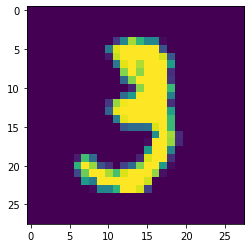

In [3]:
 #Load MNISt dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Check number of samples (60000 in training and 10000 in test)
# Each image has 28 x 28 pixels
print("Train Image Shape: ", train_images.shape, "Train Label Shape: ", train_labels.shape) 
print("Test Image Shape: ", test_images.shape, "Test Label Shape: ", test_labels.shape) 

#  Visualizing a random image (11th) from training dataset
print("Visualizing a random image (11th) from training dataset")
_ = plt.imshow(train_images[10])
# print(type(train_images))
# print(train_images)
# print(train_labels)

#Preprocessing and reshaping

In [4]:
# Preprocessing: Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [5]:
train_images_3d = train_images.reshape(60000,28,28,1)
test_images_3d = test_images.reshape(10000,28,28,1)
print(train_images_3d.shape, test_images_3d.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


#CNN Neural Network without optimized hyperparameters

In [ ]:
model = Sequential([Conv2D(50, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)), 
          Conv2D(75, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu'), 
          MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
          Conv2D(125, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2,2)), Dropout(0.25), 
          Flatten(),
          Dense(500, activation='relu'), Dropout(0.4),
          Dense(250, activation='relu'), Dropout(0.3),
          Dense(10, activation='softmax')])

print(model.summary())

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 28, 28, 50)        100       
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 28, 28, 75)        3825      
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 14, 14, 75)        0         
_________________________________________________________________
dropout_176 (Dropout)        (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 14, 14, 125)       9500      
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 7, 7, 125)         0         
_________________________________________________________________
dropout_177 (Dropout)        (None, 7, 7, 125)       

In [ ]:
import time 
start_time = time.time()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=128,)


print("--- %s seconds ---" % (time.time() - start_time))


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 4s 8ms/step - loss: 0.5255 - accuracy: 0.8279
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2863 - accuracy: 0.9098
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2394 - accuracy: 0.9247
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.21

In [ ]:
performance = model.evaluate(test_images_3d, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance[1]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.2293 - accuracy: 0.9356
Accuracy on Test samples: 0.9355999827384949


#HyperOpt: Optimizing hyperparameters - DO NOT RUN THIS UNLESS YOU WANT TO WAIT FOREVER; SKIP SECTION

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials


def optimize_cnn(hyperparameter):
  
  # Define model using hyperparameters 

  cnn_model = Sequential([Conv2D(50, kernel_size=hyperparameter['conv_kernel_size'], strides = hyperparameter['conv_stride'], padding='same', activation=hyperparameter['activation'], input_shape=(28,28,1)), 
          Conv2D(75, kernel_size=hyperparameter['conv_kernel_size'], strides = hyperparameter['conv_stride'], padding='same', activation=hyperparameter['activation']), 
          MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']),
          Conv2D(125, kernel_size=hyperparameter['conv_kernel_size'], strides = hyperparameter['conv_stride'], padding='same', activation=hyperparameter['activation']),
          MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']), 
          Flatten(),
          Dense(500, activation='relu'), Dropout(0.4),
          Dense(250, activation='relu'), Dropout(0.3),
          Dense(10, activation='softmax')])
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)

  # create a training (50K samples) and validation (10K samples) subsets from training images.
  # Validation subset will be used to find the optimal hyperparameters
  train_X, train_y = train_images_3d[:50000], train_labels[:50000]
  valid_X, valid_y = train_images_3d[50000:], train_labels[50000:]

  _ = cnn_model.fit(train_X, to_categorical(train_y), epochs=10, batch_size=128, verbose=0)
  # Evaluate accuracy on validation data
  performance = cnn_model.evaluate(valid_X, to_categorical(valid_y), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")
  # We want to minimize loss i.e. negative of accuracy
  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})
  

# Define search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    #choice of stride
    'conv_stride': hp.choice('conv_stride',[1,2]),
    #choice of activation
    'activation': hp.choice('activation', ['relu','selu','tanh']),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
}

trials = Trials()

# Find the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=25,
    )

print("==================================")
print("Best Hyperparameters", best)

# You can retrain the final model with optimal hyperparameters on train+validation data

# Or you can use the model returned directly
# Find trial which has minimum loss value and use that model to perform evaluation on the test data
test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(test_images_3d, to_categorical(test_labels))

print("==================================")
print("Test Accuracy: ", performance[1])

  0%|                                                                              | 0/25 [00:00<?, ?trial/s, best loss=?]WARNING:tensorflow:AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x000002A4C0D0A8B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
  0%|                                                                              | 0/25 [00:00<?, ?

#Model with optimized Hyperparameters

In [6]:
model = Sequential([Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)), 
          Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'), 
          MaxPooling2D(pool_size=(2,2)), Dropout(0.2538798802417247),
          Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2,2)), Dropout(0.2538798802417247), 
          Flatten(),
          Dense(500, activation='relu'), Dropout(0.4),
          Dense(250, activation='relu'), Dropout(0.3),
          Dense(10, activation='softmax')])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 75)        33825     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 125)       84500     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 125)         0

In [7]:
import time 
start_time = time.time()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=128,)


print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2145 - accuracy: 0.9320
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0630 - accuracy: 0.9817
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0459 - accuracy: 0.9866
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0387 - accuracy: 0.9884
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0307 - accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0280 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0272 - accuracy: 0.9920
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0224 - accuracy: 0.9930
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0192 - accuracy: 0.9939
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0188 - accura

In [8]:
performance = model.evaluate(test_images_3d, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0257 - accuracy: 0.9929
Accuracy on Test samples: 0.992900013923645
